epoch：当一个完整的数据集通过了神经网络一次并且返回了一次，这个过程称为一次Epoch（所有训练样本在神经网络中都进行了一次正向传播和一次反向传播）

batch:一个Epoch训练样本数量可能太过庞大，就需要把它分成多个小块，也就是就是分成多个Batch 来进行训练。

batch_size:每批样本的大小。

iteration:训练一个Batch就是一次Iteration。

https://blog.csdn.net/weixin_38754799/article/details/109831970

In [1]:
import tensorflow as tf   # import tensorflow
from tensorflow import keras   # import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### load dataset

In [2]:
# load fashion mnist
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
# the dataset has been splitted into training set and test set
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
# 60000 pictures, 28*28 pixels
X_train_full.shape

(60000, 28, 28)

In [6]:
# create validation set and scale the input features because we will use gradient descent
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

#### creating model using the sequential API

In [9]:
# build the neural network: a classification MLP with two hidden layers
# 创建一个sequential model，最简单的keras model
model=keras.models.Sequential()  
# first layer, to convert each input image into a 1D array
model.add(keras.layers.Flatten(input_shape=[28,28]))  
# 增加一个dense hidden layer，300个神经元，激活函数为ReLU
model.add(keras.layers.Dense(300, activation="relu"))
# 增加第二个dense hidden layer，100个神经元，激活函数为ReLU
model.add(keras.layers.Dense(100, activation="relu"))
# dense output layer，10个神经元（每个class对应一个），激活函数为softmax
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# 或者在创建sequential model的同时，直接把各层layer丢进去
'''
model=keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)'''

In [10]:
# 查看所有layer信息，包括name，output shape，number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
weights,biases=model.layers[1].get_weights()

In [27]:
weights

array([[ 0.05679351,  0.04496163,  0.05245908, ...,  0.03877431,
         0.04474773,  0.05409236],
       [ 0.03384101,  0.02946174, -0.06947499, ..., -0.00394405,
        -0.05674815,  0.06662317],
       [-0.05259575, -0.00846025,  0.00281113, ...,  0.06809573,
        -0.07235403, -0.04419785],
       ...,
       [ 0.06504199, -0.05851411, -0.04070387, ..., -0.01570598,
         0.03217216,  0.04528802],
       [ 0.00701483,  0.06001338, -0.03198949, ..., -0.06669988,
         0.02508453, -0.04320345],
       [ 0.04886741, -0.03182865,  0.02542028, ..., -0.04646078,
         0.0452695 , -0.02311349]], dtype=float32)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### compile the model

In [11]:
# specify the loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd ', # stochastic gradient descent
             metrics=['accuracy'])

#### train and evaluate the model

In [12]:
history=model.fit(X_train,y_train,epochs=30,   # input:input features + traget classes + number of epoches
                 validation_data=(X_valid,y_valid))   # validation_data: to detect whether overfit

Epoch 1/30
1719/1719 [==============================] - 13s 2ms/step - loss: 0.7160 - accuracy: 0.7667 - val_loss: 0.5162 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4857 - accuracy: 0.8303 - val_loss: 0.4326 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4415 - accuracy: 0.8451 - val_loss: 0.4313 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4149 - accuracy: 0.8542 - val_loss: 0.4094 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3950 - accuracy: 0.8606 - val_loss: 0.3839 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3787 - accuracy: 0.8665 - val_loss: 0.3633 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3656 - accuracy: 0.8697 - val_loss: 0.3595 - val_accuracy

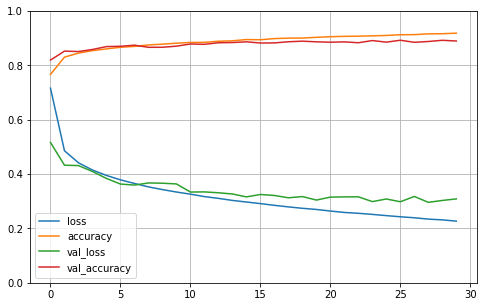

In [17]:
# plot learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
# 如果不满意，可以回去继续调整hyperparameters，比如the number of layers, the number of neurons per layer,
# the types of activation functions we use for each hidden layer, the number of training epochs, the batch size
# 如果满意，则用这个模型在test set计算泛化误差
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.4500 - accuracy: 0.8356


[70.44995880126953, 0.8356000185012817]

In [19]:
# 用于predict
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 117ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_pred=np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')